# Running Experiments on a Quanutm Computer Demo

In [66]:
# Imports!
from qiskit import QuantumCircuit, Aer, IBMQ, execute, providers, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.providers.jobstatus import JobStatus
import time

# my_personal_token = "3dcdaa32c49ad246c204abe6c814e414786b268d997eb1bbc625a39c3cd9aaeade5080d57a360d0b2680458a8a38c9f455c9a931b9cb4849592633665c2cc2be"
# IBMQ.save_account(my_personal_token)

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-05 20:04:35,603: Credentials are already in use. The existing account in the session will be replaced.


## First we can create a circuit

In [17]:
demo = QuantumCircuit(4,4)
for i in range(4):
    demo.h(i)
    demo.measure(i,i)
demo

## Next we can draw a diagram of what we built

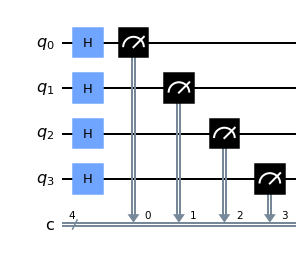

In [18]:
demo.draw("mpl")

## We Can simulate it too!

In [19]:
simulator = Aer.get_backend('aer_simulator') # Choosing the simulator we want to use
job = execute(demo, simulator, shots = 1024) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator

## Then we can plot the results

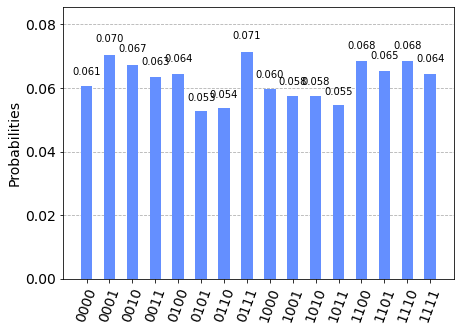

In [20]:
counts = result.get_counts() 
plot_histogram(counts)

## We can even send it off to run on a real quantum device!

### First we find the least busy computer

In [63]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 and 
                                        not x.configuration().simulator and x.status().operational==True))
status = backend.status()

print(f"Best Backend {backend}, Number of Jobs in queue: {status.pending_jobs}")

Best Backend ibmq_santiago, No. Jobs in queue: 1


## If that all looks good we can run our circuit!

In [69]:
job = execute(demo, backend, shots=1000)

# This is not necessary but nice to see updates
while not job.done():
    print(f"Job status of job: {job.job_id()} is {job.status()}")
    if job.running():
        print('Job is running')
    else:
        print(f"Job is position {job.queue_position()} in the queue")
    time.sleep(10)

<JobStatus.VALIDATING: 'job is being validated'>

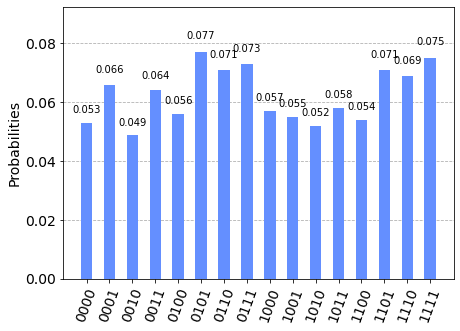

In [72]:
result = job.result()
counts = result.get_counts() 
plot_histogram(counts)

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*